In [1]:
import os
import numpy as np
from keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

C:\Users\Mahmoud Montaser\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Mahmoud Montaser\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\Mahmoud Montaser\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
view = 0
batch_sz = 4
epochs = 1
steps_per_epoch = 1000
validation_steps = 100

## Load Your Data :

In [3]:
## reading and storing data
IMG_WIDTH=256
IMG_HEIGHT=256
NO_CHANNELS=3

train_imgs = 'train'                   # path of the train images
train_labels = 'train_labels/'         # Path of the Labels Images ( Masks )

val_imgs = "val"
val_labels = "val_labels"

test = "test"
test_labels="test_labels"

xtrain_ids = os.listdir(os.path.join(train_imgs))          # to read the images ids
ytrain_ids =os.listdir(os.path.join(train_labels))

xval_ids = os.listdir(os.path.join(val_imgs))
yval_ids= os.listdir(os.path.join(val_labels))

test_ids = os.listdir(os.path.join(test))

X_train = np.zeros((len(xtrain_ids),IMG_WIDTH,IMG_HEIGHT,NO_CHANNELS),dtype='float32') ## Empty Numpy arrays
#print(X_train)
Y_train = np.zeros((len(ytrain_ids),IMG_WIDTH,IMG_HEIGHT,NO_CHANNELS),dtype='float32')

X_val = np.zeros((len(xval_ids),IMG_WIDTH,IMG_HEIGHT,NO_CHANNELS),dtype='float32')
Y_val = np.zeros((len(yval_ids),IMG_WIDTH,IMG_HEIGHT,NO_CHANNELS),dtype='float32')

xTest = np.zeros((len(test_ids),IMG_WIDTH,IMG_HEIGHT,NO_CHANNELS),dtype='float32')

In [4]:
X_train.shape

(369, 256, 256, 3)

In [5]:
print(len(xtrain_ids))
print(len(ytrain_ids))

369
369


In [6]:
print('Number of train frames: ' + str(len(os.listdir('train'))))
print('Number of train labels: ' + str(len(os.listdir('train_labels'))))
print('Number of val frames: ' + str(len(os.listdir('val'))))
print('Number of val labels: ' + str(len(os.listdir('val_labels'))))
print('Number of test frames: ' + str(len(os.listdir('test'))))
print('Number of test labels: ' + str(len(os.listdir('test_labels'))))
print('Total frames: ' + str(len(os.listdir('train')) + len(os.listdir('val')) + len(os.listdir('test'))))

Number of train frames: 369
Number of train labels: 369
Number of val frames: 100
Number of val labels: 100
Number of test frames: 232
Number of test labels: 232
Total frames: 701


## For Train :

In [7]:
def adjust_mask(mask, flat=False):
    
    semantic_map = []
    for colour in list(cls2rgb.values()):  # values bte3et el classes el fel dictionary
        
        equality = np.equal(mask, colour)          # 256x256x3 with True or False
        class_map = np.all(equality, axis = -1)     # 256x256 If all True, then True, else False
        semantic_map.append(class_map) # List of 256x256 arrays, map of True for a given found color at the pixel, and False otherwise.
    semantic_map = np.stack(semantic_map, axis=-1)   # 256x256x32 True only at the found color, and all False otherwise.
    if flat:
        semantic_map = np.reshape(semantic_map, (-1,256*256))

    return np.float32(semantic_map)# convert to numbers

## For Validation Data :

In [8]:
import pandas as pd
classes = pd.read_csv('class_dict.csv', index_col =0)

classes



,r,g,b
name,,,
Animal,64,128,64
Archway,192,0,128
Bicyclist,0,128,192
Bridge,0,128,64
Building,128,0,0
Car,64,0,128
CartLuggagePram,64,0,192
Child,192,128,64
Column_Pole,192,192,128


In [9]:
n_classes= len(classes)
print(n_classes)

32


To access the colors, we can index the dataframe with its row index name using the .loc operation.  

we do that 3lshan nst5dem el Class color da , w n apply it 3la el Picture , 3lshan n3rf kol pixel fel picture belongs to ay class 

In [10]:
cls2rgb = {cl:list(classes.loc[cl, :]) for cl in classes.index}

In [11]:
cls2rgb

{'Animal': [64, 128, 64],
 'Archway': [192, 0, 128],
 'Bicyclist': [0, 128, 192],
 'Bridge': [0, 128, 64],
 'Building': [128, 0, 0],
 'Car': [64, 0, 128],
 'CartLuggagePram': [64, 0, 192],
 'Child': [192, 128, 64],
 'Column_Pole': [192, 192, 128],
 'Fence': [64, 64, 128],
 'LaneMkgsDriv': [128, 0, 192],
 'LaneMkgsNonDriv': [192, 0, 64],
 'Misc_Text': [128, 128, 64],
 'MotorcycleScooter': [192, 0, 192],
 'OtherMoving': [128, 64, 64],
 'ParkingBlock': [64, 192, 128],
 'Pedestrian': [64, 64, 0],
 'Road': [128, 64, 128],
 'RoadShoulder': [128, 128, 192],
 'Sidewalk': [0, 0, 192],
 'SignSymbol': [192, 128, 128],
 'Sky': [128, 128, 128],
 'SUVPickupTruck': [64, 128, 192],
 'TrafficCone': [0, 0, 64],
 'TrafficLight': [0, 64, 64],
 'Train': [192, 64, 128],
 'Tree': [128, 128, 0],
 'Truck_Bus': [192, 128, 192],
 'Tunnel': [64, 0, 64],
 'VegetationMisc': [192, 192, 0],
 'Void': [0, 0, 0],
 'Wall': [64, 192, 0]}

## Now let's visualize and explore some samples:

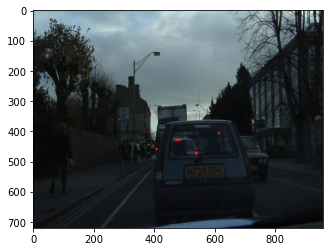

In [12]:
from keras.preprocessing import image     
import cv2
import matplotlib.pyplot as plt


img = image.load_img("train/0001TP_009210.png")
plt.imshow(img)

## Let's have a look on the masks (the ground truth)  ( Labels ) 

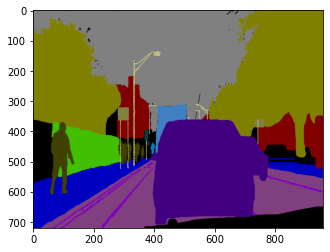

In [13]:
mask  = image.load_img("train_labels/0001TP_009210_L.png")
plt.imshow(mask)

3lshan nshof el shape, lazem ne7wellha numpy 

In [14]:
import numpy as np
mask = np.array(mask)# Now colors are the same as in the dict, since keras load_img uses RGB order.
mask.shape

(720, 960, 3)

 AdjustMask  function : bet3addi 3la kol el pixels el fel mask , w tshof el R G B beta3 el pixel fe kol mask , w ted5ol fel dictionary da , w tshof kol pixel ana gebtaha  r g b bet3ha kam w tekarenha bel dictionary , w hat3ml 1 hot encoded vector , lw el pixel shabh class mo3yn , hatdelo 1 w el ba2i zeros .

 Also to Convert the Masks ( Labels ) from 3 channels , to 32 channels 

In [15]:
new_mask = adjust_mask(mask)

In [16]:
new_mask.shape

(720, 960, 32)

## me7tag eni a7wel el yTrain , yVal 

## Apply el kalam da 3la kol el Masks    + 3lshan arg3 tani l 3 colors 

In [17]:
idx2rgb={idx:np.array(rgb) for idx, (cl, rgb) in enumerate(cls2rgb.items())}
idx2rgb

{0: array([ 64, 128,  64]),
 1: array([192,   0, 128]),
 2: array([  0, 128, 192]),
 3: array([  0, 128,  64]),
 4: array([128,   0,   0]),
 5: array([ 64,   0, 128]),
 6: array([ 64,   0, 192]),
 7: array([192, 128,  64]),
 8: array([192, 192, 128]),
 9: array([ 64,  64, 128]),
 10: array([128,   0, 192]),
 11: array([192,   0,  64]),
 12: array([128, 128,  64]),
 13: array([192,   0, 192]),
 14: array([128,  64,  64]),
 15: array([ 64, 192, 128]),
 16: array([64, 64,  0]),
 17: array([128,  64, 128]),
 18: array([128, 128, 192]),
 19: array([  0,   0, 192]),
 20: array([192, 128, 128]),
 21: array([128, 128, 128]),
 22: array([ 64, 128, 192]),
 23: array([ 0,  0, 64]),
 24: array([ 0, 64, 64]),
 25: array([192,  64, 128]),
 26: array([128, 128,   0]),
 27: array([192, 128, 192]),
 28: array([64,  0, 64]),
 29: array([192, 192,   0]),
 30: array([0, 0, 0]),
 31: array([ 64, 192,   0])}

## To Convert the mask Back   from 32 channels  to 3 channels only like the original  

In [18]:
# Map the idx back to rgb          # Hena  3lsh 
def map_class_to_rgb(p):
  
  return idx2rgb[p[0]]

rgb_mask = np.apply_along_axis(map_class_to_rgb, -1, np.expand_dims(np.argmax(new_mask, axis=-1), -1))  

## -1 means 3adad el masks kolha 

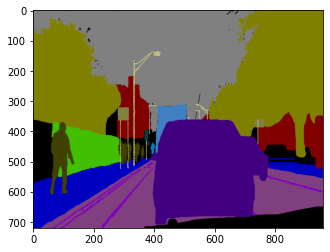

In [19]:
plt.imshow(rgb_mask)

 ## ---$$$- Build The Model ---###-  UNet   

In [20]:
import numpy as np 
import os
#import skimage.io as io
#import skimage.transform as trans
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras


def unet(n_classes, pretrained_weights = None,input_size = (256,256,3), flat=False, ohe=True):
    
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    
    conv10 = Conv2D(len(classes), (1,1), padding='same')(conv9)  # the last layer before the mask , 1*1*classes
    if flat:
        output_layer = Reshape((256*256,len(classes)))(conv10)
    else:
        output_layer = conv10
    output_layer = Activation('softmax')(output_layer)
     

    model = Model( inputs,output_layer)

    model.compile(optimizer =tf.keras.optimizers.Adam(1e-4) , loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    #model.summary()

    if(pretrained_weights):
        model.load_weights(pretrained_weights)

    return model

In [21]:
model = unet(len(classes))
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 256, 256, 64  36928       ['conv2d[0][0]']                 
                                )                                                             

In [22]:
from keras.preprocessing.image import load_img
def load_raw_CAMVID(data_type='train', enc='ohe', shape='normal'):
    img_path = data_type + '/'
    labels_path = data_type + '_labels/'
  # without adding target_size=(256,256) in load_img we get Out of mem: 421x960x720x32x4bytes is around 34GB!
    x = np.array([np.array(load_img(str(img_path) + file, target_size=(256,256)))*1./255 for file in sorted(os.listdir(img_path))])
    if(enc=='ohe'):
    
        y = np.array([np.array(load_img(str(labels_path) + file, target_size=(256,256))) for file in sorted(os.listdir(labels_path))])
    elif(enc=='sparse_cat'):
        y = np.array([np.array(load_img(str(labels_path) + file, target_size=(256,256))) for file in sorted(os.listdir(labels_path))])
    if(shape == 'flat'):
        y = np.reshape(y.shape[0], y.shape[1]*y.shape[2])
        y = np.expand_dims(y, axis=-1)
    return x, y

## Notee : we did do the adjust Mask Here on ( y ) because we will do it in the Generator function 

In [23]:
import time
start = time.time()
X_train, Y_train = load_raw_CAMVID(data_type='train')           # load camvid returns x , y  , x for xTrain , y for yTrain
#x_test, y_test = load_CAMVID(data_type='test')# Don't load test for RAM consumption
X_val, Y_val = load_raw_CAMVID(data_type='val')
end = time.time()
print('Time elapsed: ', end-start)


Time elapsed:  11.489366054534912


In [24]:
print(X_train.shape)
print(Y_train.shape)
#print(x_test.shape)
#print(y_test.shape)
print(X_val.shape)
print(Y_val.shape)

(369, 256, 256, 3)
(369, 256, 256, 3)
(100, 256, 256, 3)
(100, 256, 256, 3)


In [25]:
# Data generator
batch_sz = 4
#https://keras.io/preprocessing/image/
from keras.preprocessing.image import ImageDataGenerator
# we create two instances with the same arguments

# VI Note: use the same seed for image_datagen and mask_datagen to ensure the transformation for image and mask is the same
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
                    #rescale=1./255)# Data is already scaled when loaded

mask_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
                    #preprocessing_function=adjust_mask)# This is not possible since the preprocessing_function can only return the same shape as image

image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen  = ImageDataGenerator(**mask_gen_args) 

# Provide the same seed and keyword arguments to the fit and flow methods
seed = 1
#image_datagen.fit(images, augment=True, seed=seed)
#mask_datagen.fit(masks, augment=True, seed=seed)

image_generator = image_datagen.flow(
    X_train,
    seed=seed,
    batch_size=batch_sz)

mask_generator = mask_datagen.flow( 
    Y_train,
    seed=seed,
    batch_size=batch_sz)

# combine generators into one which yields image and masks
train_generator = zip(image_generator, mask_generator)



In [26]:

def train_generator_fn():

    for (img,mask) in train_generator:
        new_mask = adjust_mask(mask)
        yield (img,new_mask)  
        
val_image_generator = image_datagen.flow(
    X_val,
    seed=seed,
    batch_size=batch_sz)

val_mask_generator = mask_datagen.flow(
    Y_val,
    seed=seed,
    batch_size=batch_sz)

# combine generators into one which yields image and masks
val_generator = zip(val_image_generator, val_mask_generator)        
        
def val_generator_fn():

    for (img,mask) in val_generator:
        new_mask = adjust_mask(mask)
        yield (img,new_mask)  


In [27]:
view = 0
batch_sz = 4
epochs = 7
steps_per_epoch = 120
validation_steps = 30

In [28]:
from keras.callbacks import ReduceLROnPlateau ,EarlyStopping ,ModelCheckpoint
reduce_lr = ReduceLROnPlateau(
    monitor = "val_accuracy", 
    patience = 2,
    verbose = 1, 
    factor = 0.5, 
    min_lr = 0.000000001
)

early_stopping = EarlyStopping(
    monitor = "val_accuracy",
    patience = 5,
    verbose = 1,
    mode = "max",
)

checkpoint = ModelCheckpoint(
    monitor = "val_accuracy",
    filepath = "Camvid.hdf5",
    verbose = 1,
    save_best_only = True, 
    save_weights_only = True
)
callbacks= [reduce_lr]

In [29]:
model.fit_generator(train_generator_fn(),
                    validation_data=val_generator_fn(),
                    steps_per_epoch=len(X_train)//batch_sz,
                    validation_steps=len(X_val)//batch_sz,
                    epochs=200,
                    callbacks=callbacks)

<ipython-input-29-936697bf67cd>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator_fn(),


Epoch 1/2
120/120 [==============================] - 85s 601ms/step - loss: 1.7200 - accuracy: 0.4696 - val_loss: 1.2113 - val_accuracy: 0.6066 - lr: 1.0000e-04
Epoch 2/2
120/120 [==============================] - 67s 562ms/step - loss: 1.0867 - accuracy: 0.6114 - val_loss: 1.0276 - val_accuracy: 0.6427 - lr: 1.0000e-04


In [30]:
def visualize_seg(img, gt_mask, shape='normal', gt_mode='sparse'):
    plt.figure(1)
  
  # Img
    plt.subplot(311)
    plt.imshow(img)
  
  # Predict
    pred_mask = model.predict(np.expand_dims(img, 0))
    pred_mask = np.argmax(pred_mask, axis=-1)
    pred_mask = pred_mask[0]
    if shape=='flat':
        pred_mask = np.reshape(pred_mask, (256,256)) # Reshape only if you use the flat model. O.w. you dont need
  
    rgb_mask = np.apply_along_axis(map_class_to_rgb, -1, np.expand_dims(pred_mask, -1))
  
  # Prediction
    plt.subplot(312)
    plt.imshow(rgb_mask)
              
  # GT mask
    if gt_mode == 'ohe':
        gt_img_ohe = np.argmax(gt_mask, axis=-1)
        gt_mask = np.apply_along_axis(map_class_to_rgb, -1, np.expand_dims(gt_img_ohe, -1))              
  
    plt.subplot(313)
    plt.imshow((gt_mask).astype(np.uint8))

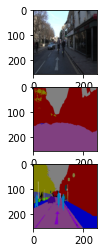

In [31]:
img = next(val_image_generator)[0]
gt_img = next(val_mask_generator)[0]
visualize_seg(img, gt_img, gt_mode='sparse')